In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]

X = pd.get_dummies(X, drop_first=True)
X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression().fit(X_train, y_train)
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)

def eval_model(model):
    p = model.predict(X_test)
    return [
        mean_absolute_error(y_test, p),
        mean_squared_error(y_test, p),
        r2_score(y_test, p),
        r2_score(y_test, p) * 100
    ]

results = {
    "Linear Regression": eval_model(lr),
    "Lasso Regression": eval_model(lasso),
    "Ridge Regression": eval_model(ridge)
}

print(pd.DataFrame(results, index=["MAE", "MSE", "R2", "R2%"]).T)


Saving Student_Performance.csv to Student_Performance.csv
                        MAE       MSE        R2        R2%
Linear Regression  1.629673  4.182255  0.988714  98.871446
Lasso Regression   2.168411  7.516813  0.979716  97.971637
Ridge Regression   1.629801  4.182878  0.988713  98.871277


<Figure size 1200x600 with 0 Axes>

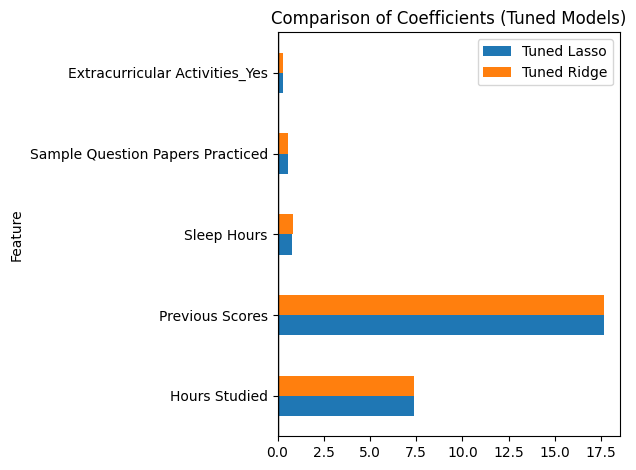

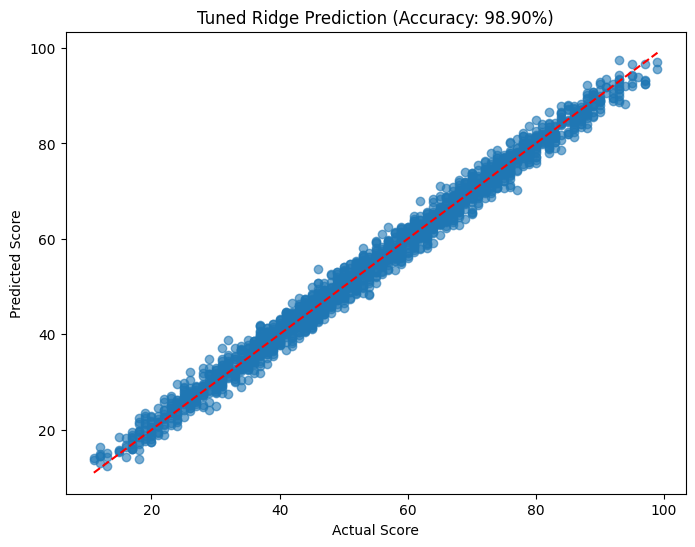

                        MAE       MSE        R2        R2%
Linear Regression  1.611121  4.082628  0.988983  98.898329
Lasso (Base)       2.168411  7.516813  0.979716  97.971637
Ridge (Base)       1.611223  4.083211  0.988982  98.898172
Lasso (Tuned)      1.611168  4.083043  0.988982  98.898217
Ridge (Tuned)      1.611121  4.082629  0.988983  98.898329

Best Lasso Alpha: 0.001
Best Ridge Alpha: 0.001


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Student_Performance.csv')

target = df.columns[-1]

X = df.drop(target, axis=1)
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
lasso_base = Lasso(alpha=1.0).fit(X_train_scaled, y_train)
ridge_base = Ridge(alpha=1.0).fit(X_train_scaled, y_train)

alphas = np.logspace(-3, 2, 50)
grid_lasso = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)

grid_ridge = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
best_ridge = grid_ridge.best_estimator_

def evaluate(model, X_t, y_t):
    preds = model.predict(X_t)
    r2 = r2_score(y_t, preds)
    return {
        'MAE': mean_absolute_error(y_t, preds),
        'MSE': mean_squared_error(y_t, preds),
        'R2': r2,
        'R2%': r2 * 100
    }

metrics = {
    'Linear Regression': evaluate(lr, X_test_scaled, y_test),
    'Lasso (Base)': evaluate(lasso_base, X_test_scaled, y_test),
    'Ridge (Base)': evaluate(ridge_base, X_test_scaled, y_test),
    'Lasso (Tuned)': evaluate(best_lasso, X_test_scaled, y_test),
    'Ridge (Tuned)': evaluate(best_ridge, X_test_scaled, y_test)
}

plt.figure(figsize=(12, 6))
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Tuned Lasso': best_lasso.coef_,
    'Tuned Ridge': best_ridge.coef_
}).set_index('Feature')
coef_df.plot(kind='barh')
plt.title('Comparison of Coefficients (Tuned Models)')
plt.axvline(0, color='black', lw=1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
preds_ridge = best_ridge.predict(X_test_scaled)
plt.scatter(y_test, preds_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title(f'Tuned Ridge Prediction (Accuracy: {metrics["Ridge (Tuned)"]["R2%"]:.2f}%)')
plt.show()

print(pd.DataFrame(metrics).T)
print("\nBest Lasso Alpha:", grid_lasso.best_params_['alpha'])
print("Best Ridge Alpha:", grid_ridge.best_params_['alpha'])


                        MAE       MSE        R2        R2%
Linear Regression  1.611121  4.082628  0.988983  98.898329
Lasso (Base)       2.168411  7.516813  0.979716  97.971637
Ridge (Base)       1.611223  4.083211  0.988982  98.898172
Lasso (Tuned)      1.611168  4.083043  0.988982  98.898217
Ridge (Tuned)      1.611121  4.082629  0.988983  98.898329

Best Lasso Alpha: 0.001
Best Ridge Alpha: 0.001


<Figure size 1200x600 with 0 Axes>

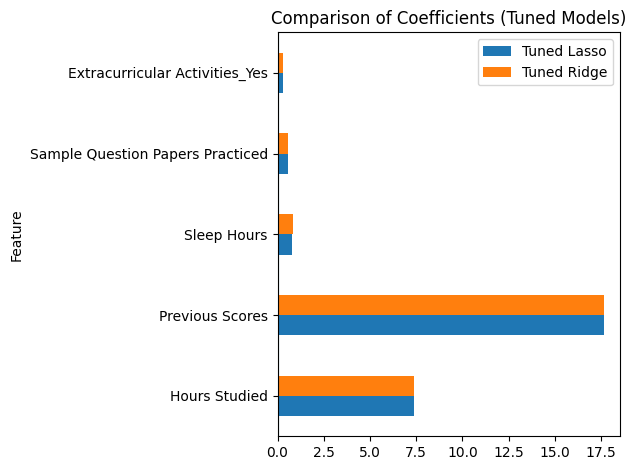

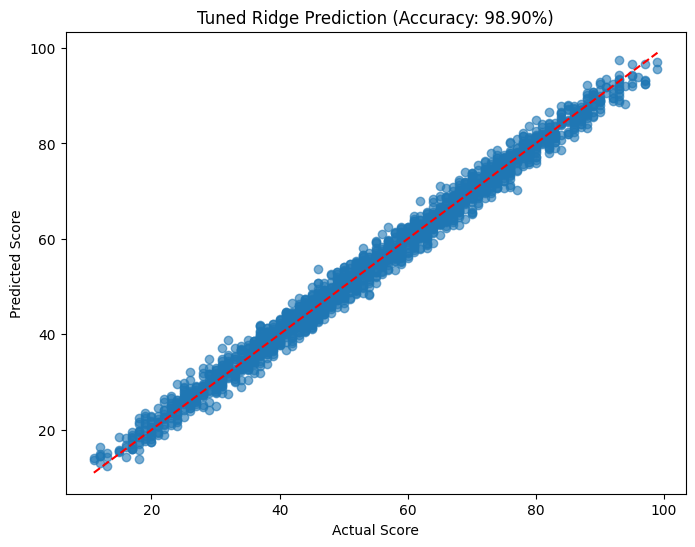

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("Student_Performance.csv")

target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
lasso_base = Lasso(alpha=1.0).fit(X_train_scaled, y_train)
ridge_base = Ridge(alpha=1.0).fit(X_train_scaled, y_train)

alphas = np.logspace(-3, 2, 50)
grid_lasso = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)

grid_ridge = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
best_ridge = grid_ridge.best_estimator_

def evaluate(model):
    p = model.predict(X_test_scaled)
    r2 = r2_score(y_test, p)
    return [mean_absolute_error(y_test, p),
            mean_squared_error(y_test, p),
            r2,
            r2 * 100]

results = {
    "Linear Regression": evaluate(lr),
    "Lasso (Base)": evaluate(lasso_base),
    "Ridge (Base)": evaluate(ridge_base),
    "Lasso (Tuned)": evaluate(best_lasso),
    "Ridge (Tuned)": evaluate(best_ridge)
}

print(pd.DataFrame(results, index=["MAE", "MSE", "R2", "R2%"]).T)
print("\nBest Lasso Alpha:", grid_lasso.best_params_["alpha"])
print("Best Ridge Alpha:", grid_ridge.best_params_["alpha"])

plt.figure(figsize=(12,6))
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Tuned Lasso": best_lasso.coef_,
    "Tuned Ridge": best_ridge.coef_
}).set_index("Feature")
coef_df.plot(kind="barh")
plt.axvline(0)
plt.title("Comparison of Coefficients (Tuned Models)")
plt.tight_layout()
plt.show()

preds = best_ridge.predict(X_test_scaled)
plt.figure(figsize=(8,6))
plt.scatter(y_test, preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title(f"Tuned Ridge Prediction (Accuracy: {results['Ridge (Tuned)'][3]:.2f}%)")
plt.show()


Optimal Lasso Alpha: 0.001
Optimal Ridge Alpha: 0.001


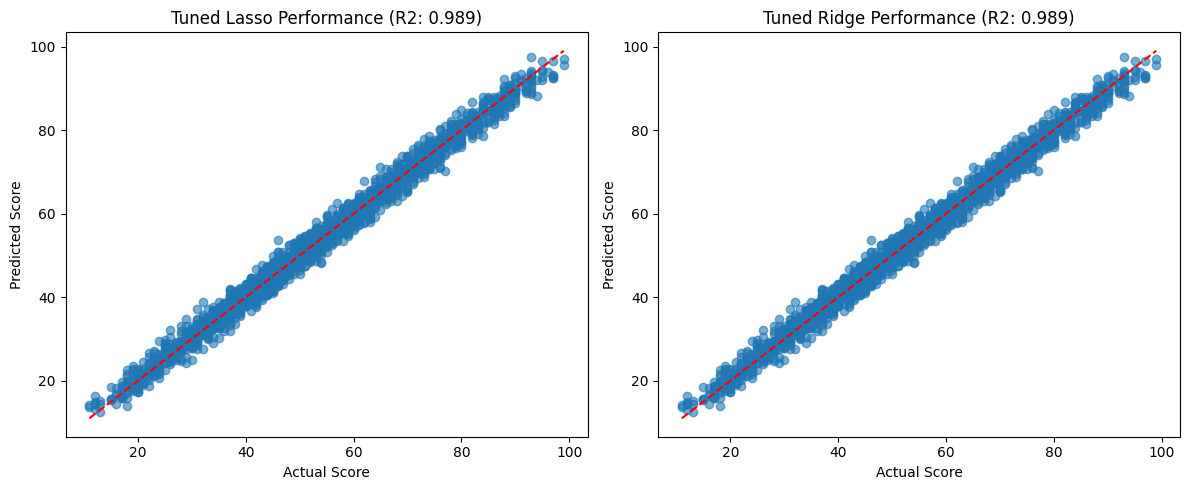

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df = pd.read_csv("Student_Performance.csv")

target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 2, 50)

lasso_cv = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)
best_lasso = lasso_cv.best_estimator_

ridge_cv = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)
best_ridge = ridge_cv.best_estimator_

print("Optimal Lasso Alpha:", lasso_cv.best_params_['alpha'])
print("Optimal Ridge Alpha:", ridge_cv.best_params_['alpha'])

pred_lasso = best_lasso.predict(X_test_scaled)
pred_ridge = best_ridge.predict(X_test_scaled)

r2_lasso = r2_score(y_test, pred_lasso)
r2_ridge = r2_score(y_test, pred_ridge)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title(f"Tuned Lasso Performance (R2: {r2_lasso:.3f})")

plt.subplot(1,2,2)
plt.scatter(y_test, pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title(f"Tuned Ridge Performance (R2: {r2_ridge:.3f})")

plt.tight_layout()
plt.show()
